In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!wget 'https://codeload.github.com/realBagher/Iran_family_income_analysis-_g6/zip/refs/heads/main'

--2024-06-12 20:06:44--  https://codeload.github.com/realBagher/Iran_family_income_analysis-_g6/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.1’

main.1                  [             <=>    ]  55.78M  3.98MB/s    in 14s     

2024-06-12 20:06:58 (3.98 MB/s) - ‘main.1’ saved [58489935]



In [ ]:
!unzip main

Archive:  main
6791ccf6e23571294eee9a75c8fafa03ea690f10
replace Iran_family_income_analysis-_g6-main/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Iran_family_income_analysis-_g6-main/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Iran_family_income_analysis-_g6-main/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Iran_family_income_analysis-_g6-main/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Iran_family_income_analysis-_g6-main/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Iran_family_income_analysis-_g6-main/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Iran_family_income_analysis-_g6-main/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Iran_family_income_analysis-_g6-main/.gitignore? [y]es

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color= orange>
تابع دریافت اطلاعات

In [ ]:
def get_data(urban_rural, sheet ,columns , years = [1398,1399,1400,1401],province = None):


    if province != None:
      Df = []
      for year in years:
        X = get_data(urban_rural, sheet ,columns , years = [year])
        X_province = get_data(urban_rural, 'Data' ,['Address', 'province'] , years = [year])
        X = pd.merge(X_province, X, on='Address')
        X = X[X.province == province].rename(columns = {'year_y': 'year'})
        Df.append(X)
      return pd.concat(Df)

    DF = []
    for year in years:
      df_list = []
      for u_r in urban_rural:
        path_file = '/content/Iran_family_income_analysis-_g6-main/'
        path_file = path_file +u_r+str(year)+'/'+u_r+str(year)+sheet+'.csv'
        df_list.append(pd.read_csv(path_file)[columns])
      df = pd.concat(df_list)
      df['year'] = year
      DF.append(df)
    return pd.concat(DF)


In [ ]:
def get_data_2(urban_rural, sheet ,columns , years = [1398,1399,1400,1401],province = None):


    if province != None:
      Df = []
      for year in years:
        X = get_data_2(urban_rural, sheet ,columns , years = [year])
        X_province = get_data(urban_rural, 'Data' ,['Address', 'province'] , years = [year])
        X = pd.merge(X_province, X, on='Address')
        X = X[X.province == province].rename(columns = {'year_y': 'year'})
        Df.append(X)
      return pd.concat(Df)

    DF = []
    for year in years:
      df_list = []
      for u_r in urban_rural:
        path_file = '/content/Iran_family_income_analysis-_g6-main/'
        path_file = path_file +'StatAnalysis/'+u_r+str(year)+sheet+'.csv'
        df_list.append(pd.read_csv(path_file)[columns])
      df = pd.concat(df_list)
      df['year'] = year
      DF.append(df)
    return pd.concat(DF)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color= orange>
ماتریس هم بستگی برای آماری های روستایی

                       food  clothes and shoes   housing  healthcare
food               1.000000           0.460715  0.437256    0.223984
clothes and shoes  0.460715           1.000000  0.222302    0.159390
housing            0.437256           0.222302  1.000000    0.202242
healthcare         0.223984           0.159390  0.202242    1.000000


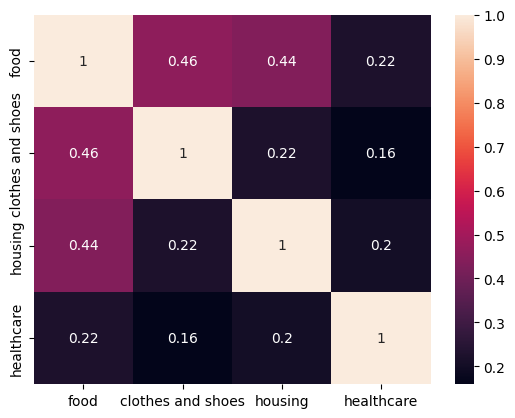

In [ ]:
# food cost :P3S01
# The cost of clothes and shoes : P3S06.csv
# housing cost : P3S04
# The cost of healthcare : P3S06
names = ['food', 'clothes and shoes', 'housing', 'healthcare']
sheets = ['P3S01', 'P3S03', 'P3S04' , 'P3S06']
df_list = []
for sheet in sheets:
    df = get_data('R', sheet, ['Address' ,'value']).groupby('Address').agg({'value' :'sum'})
    df_list.append(df)

R_result = pd.concat(df_list, axis=1, join="inner")
R_result.columns = names
print(R_result.corr())

sns.heatmap(R_result.corr(),annot=True)
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color= orange>
ماتریس همبستگی برای شهری

                       food  clothes and shoes   housing  healthcare
food               1.000000           0.484882  0.462412    0.218215
clothes and shoes  0.484882           1.000000  0.246311    0.158055
housing            0.462412           0.246311  1.000000    0.221182
healthcare         0.218215           0.158055  0.221182    1.000000


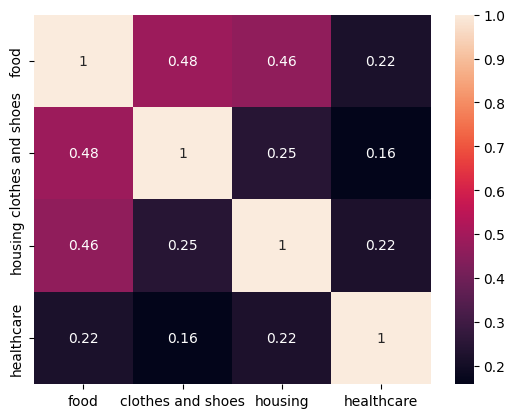

In [ ]:
# food cost :P3S01
# The cost of clothes and shoes : P3S06.csv
# housing cost : P3S04
# The cost of healthcare : P3S06
names = ['food', 'clothes and shoes', 'housing', 'healthcare']
sheets = ['P3S01', 'P3S03', 'P3S04' , 'P3S06']
df_list = []
for sheet in sheets:
    df = get_data('U', sheet, ['Address' ,'value']).groupby('Address').agg({'value' :'sum'})
    df_list.append(df)

U_result = pd.concat(df_list, axis=1, join="inner")
U_result.columns = names
print(U_result.corr())

sns.heatmap(U_result.corr(),annot=True)
plt.show()



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color= orange>
ماتریس همبستگی برای شهری و روستایی

                       food  clothes and shoes   housing  healthcare
food               1.000000           0.473103  0.397964    0.213239
clothes and shoes  0.473103           1.000000  0.226105    0.157590
housing            0.397964           0.226105  1.000000    0.222659
healthcare         0.213239           0.157590  0.222659    1.000000


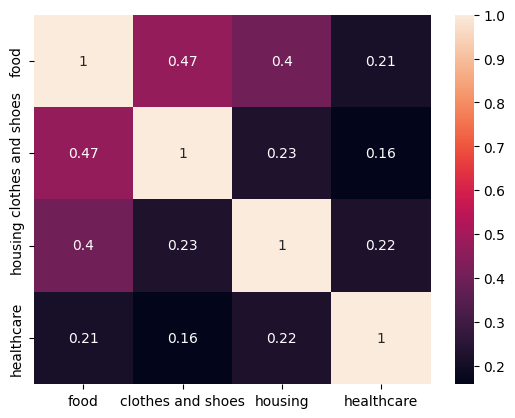

In [ ]:
Total_result = pd.concat([R_result, U_result])
print(Total_result.corr())
sns.heatmap(Total_result.corr(),annot=True)
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color= orange>
    رسم تابع توزیع برای روستایی

<ipython-input-33-069e9e24abf2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-33-069e9e24abf2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-33-069e9e24abf2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-33-069e9e24abf2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


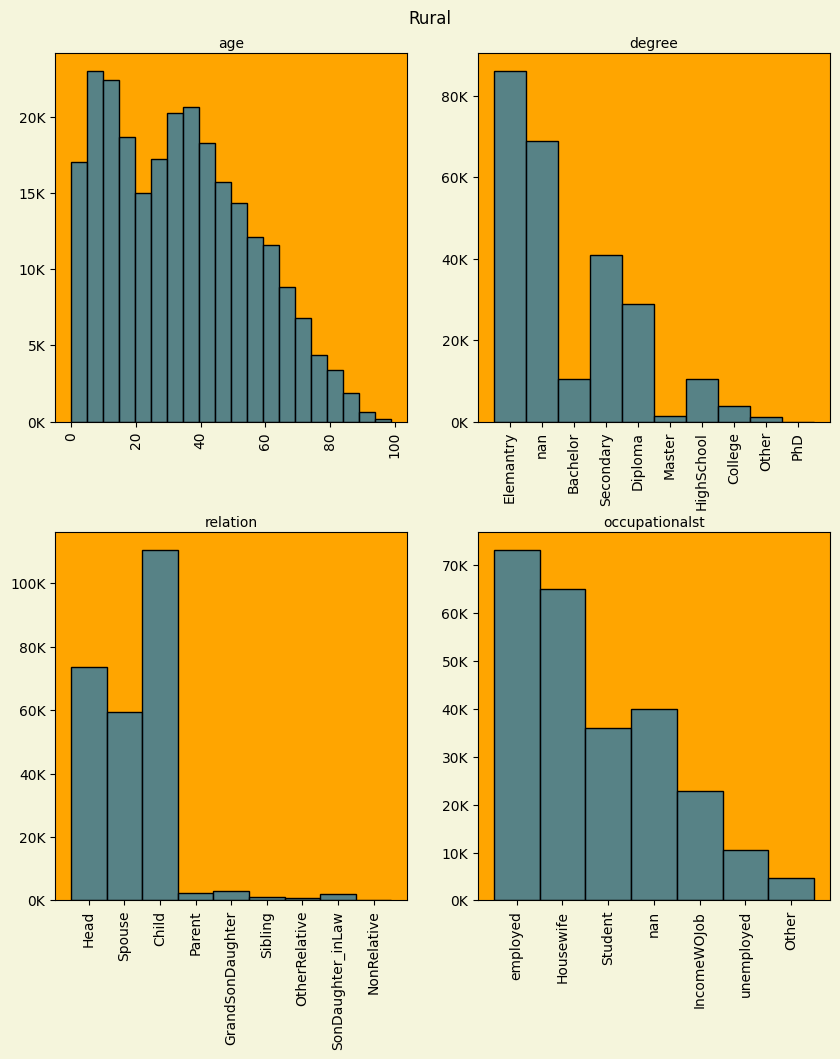

In [ ]:
columns = ['age','degree', 'relation', 'occupationalst']
X = get_data_2('R', 'P1', columns)

fig , axs = plt.subplots(2,2,figsize=(10,11))

fig.suptitle('Rural',y=0.92)
fig.set_facecolor('beige')
fig.subplots_adjust(hspace=0.3)
for i in range(4):

    x = X[columns[i]]
    #x.dropna(inplace=True)
    ax = axs[i//2][i%2]
    if i == 0:
        ax = sns.histplot(x , ax=ax, bins=20)
    else:
        ax = sns.histplot(x.astype(str), ax=ax )

    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='x', rotation=90 , labelsize=10)
    ax.set_facecolor('orange')
    ylabels = ['{:,.0f}'.format(y) + 'K' for y in ax.get_yticks()/1000]
    ax.set_yticklabels(ylabels)
    ax.set_ylabel(ylabel=None)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color= orange>
رسم تابع توزیع برای شهری

Index(['age', 'degree', 'relation', 'occupationalst', 'year'], dtype='object')


<ipython-input-34-4251fa0ea154>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


Index(['age', 'degree', 'relation', 'occupationalst', 'year'], dtype='object')


<ipython-input-34-4251fa0ea154>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


Index(['age', 'degree', 'relation', 'occupationalst', 'year'], dtype='object')


<ipython-input-34-4251fa0ea154>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


Index(['age', 'degree', 'relation', 'occupationalst', 'year'], dtype='object')


<ipython-input-34-4251fa0ea154>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


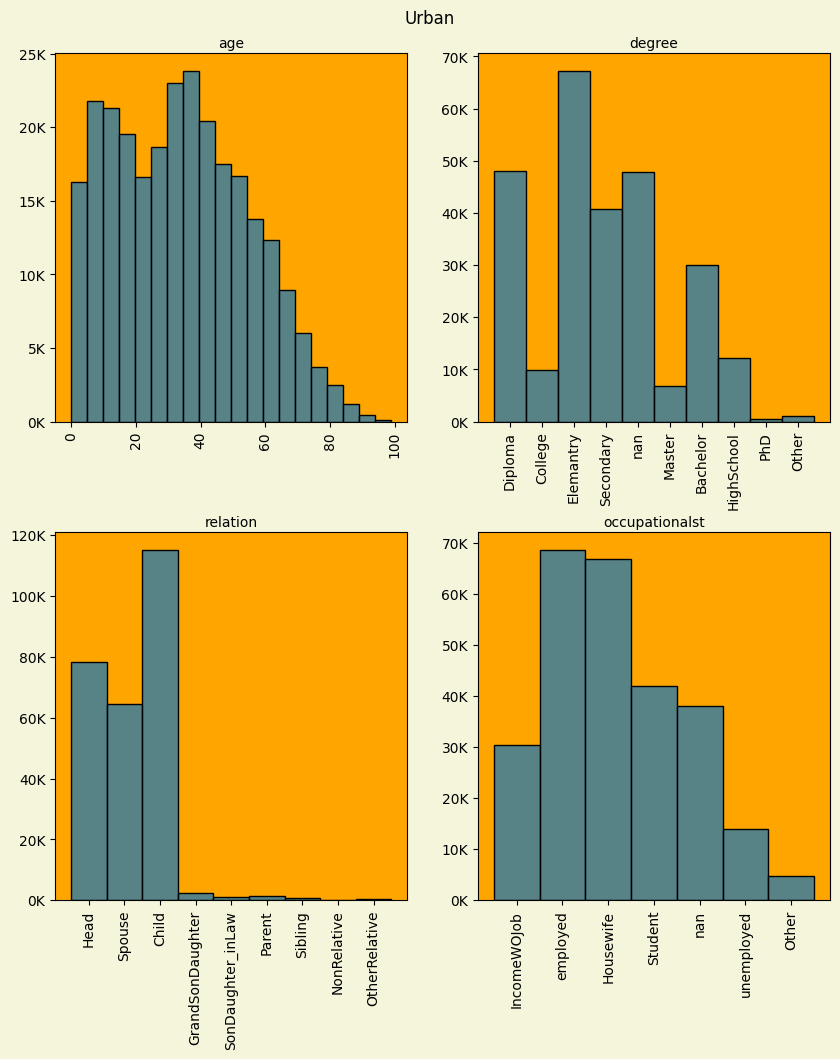

In [ ]:
columns = ['age','degree', 'relation', 'occupationalst']
X = get_data_2('U', 'P1', columns )

fig , axs = plt.subplots(2,2,figsize=(10,11))

fig.suptitle('Urban',y=0.92)
fig.set_facecolor('beige')
fig.subplots_adjust(hspace=0.3)
for i in range(4):
    print(X.columns)
    x = X[columns[i]]
    #x.dropna(inplace=True)
    ax = axs[i//2][i%2]
    if i == 0:
        ax = sns.histplot(x , ax=ax , bins=20 )
    else:
        ax = sns.histplot(x.astype(str), ax=ax )

    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='x', rotation=90 , labelsize=10)
    ax.set_facecolor('orange')
    ylabels = ['{:,.0f}'.format(y) + 'K' for y in ax.get_yticks()/1000]
    ax.set_yticklabels(ylabels)
    ax.set_ylabel(ylabel=None)
plt.show()

<ipython-input-38-ef19b34e4939>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-38-ef19b34e4939>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-38-ef19b34e4939>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-38-ef19b34e4939>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


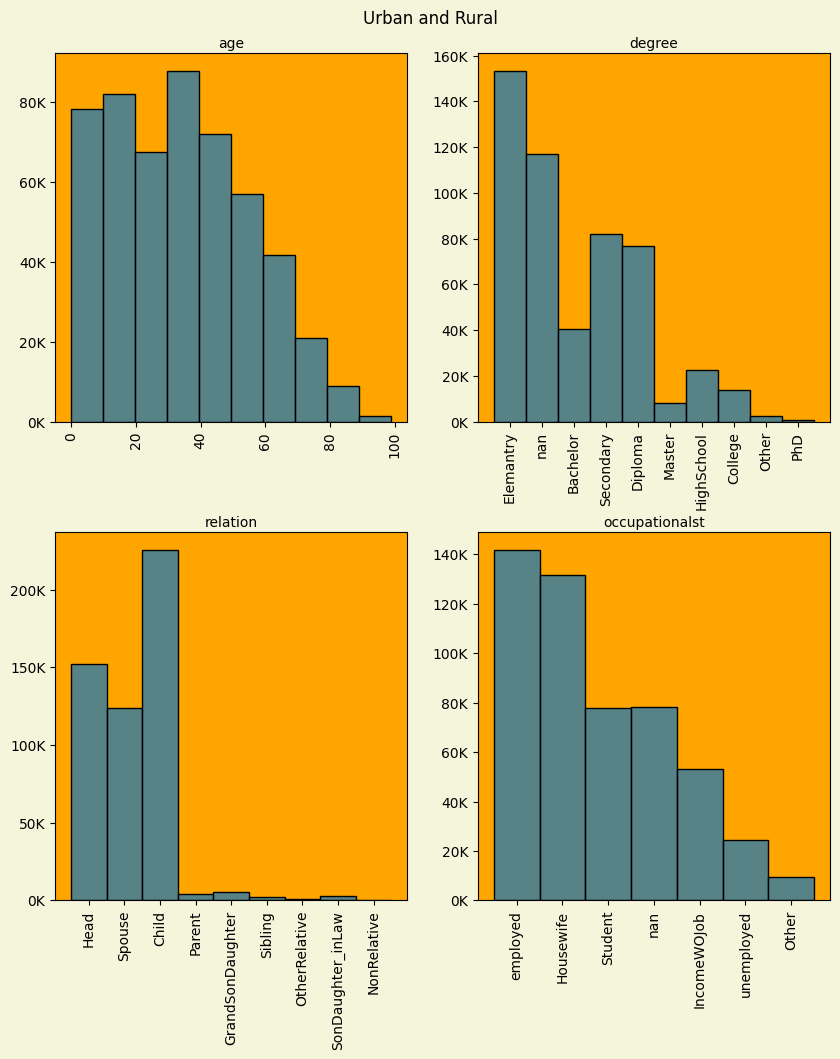

In [ ]:
columns = ['age','degree', 'relation', 'occupationalst']
X = get_data_2('RU', 'P1', columns)

fig , axs = plt.subplots(2,2,figsize=(10,11))

fig.suptitle('Urban and Rural',y=0.92)
fig.set_facecolor('beige')
fig.subplots_adjust(hspace=0.3)
for i in range(4):

    x = X[columns[i]]
    #x.dropna(inplace=True)
    ax = axs[i//2][i%2]
    if i == 0:
        ax = sns.histplot(x , ax=ax, bins=10 )
    else:
        ax = sns.histplot(x.astype(str), ax=ax )

    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='x', rotation=90 , labelsize=10)
    ax.set_facecolor('orange')
    ylabels = ['{:,.0f}'.format(y) + 'K' for y in ax.get_yticks()/1000]
    ax.set_yticklabels(ylabels)
    ax.set_ylabel(ylabel=None)


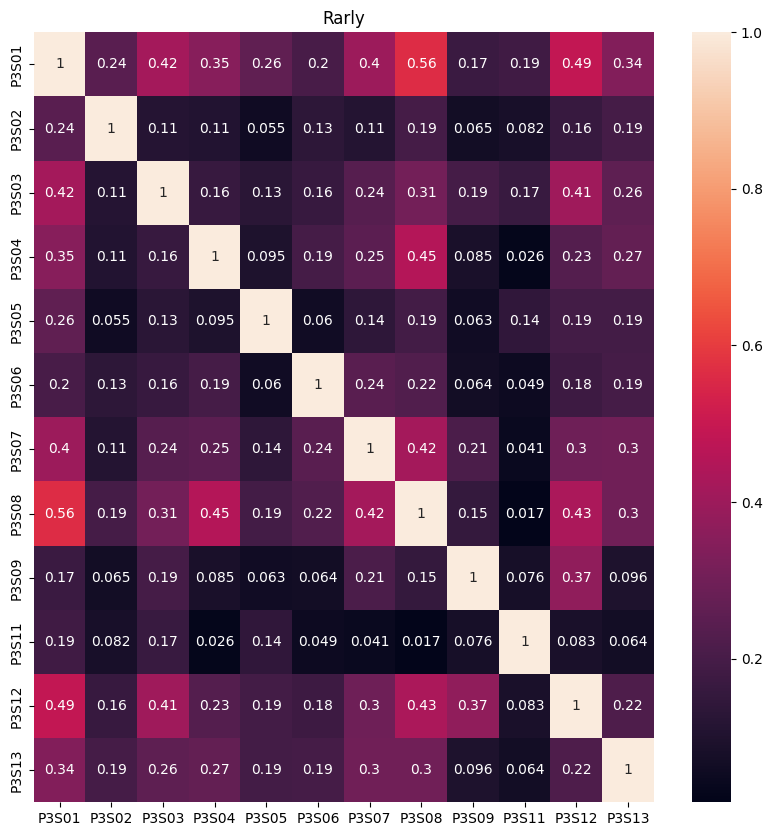

In [ ]:
sheets = [f'P3S{x:02d}' for x in range(1,14)]
sheets.remove('P3S10')
df_list = []
for sheet in sheets:
    df = get_data('R', sheet, ['Address' ,'value']).groupby('Address').agg({'value' :'sum'})
    df_list.append(df)

U_result = pd.concat(df_list, axis=1, join="inner")
U_result.columns = sheets
#print(U_result.corr())
_,ax =plt.subplots(figsize=(10,10))
ax.set_title('Rarly')
ax = sns.heatmap(U_result.corr(),annot=True)
plt.savefig('Rarly')
plt.show()

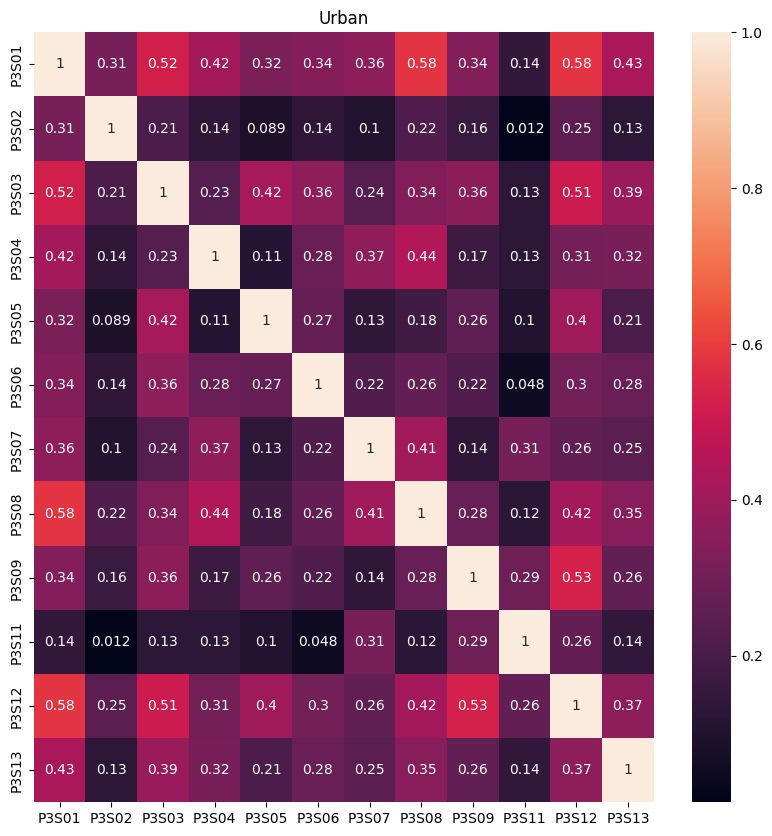

In [ ]:
sheets = [f'P3S{x:02d}' for x in range(1,14)]
sheets.remove('P3S10')
df_list = []
for sheet in sheets:
    df = get_data('U',sheet, ['Address' ,'value']).groupby('Address').agg({'value' :'sum'})
    df_list.append(df)

U_result = pd.concat(df_list, axis=1, join="inner")
U_result.columns = sheets
#print(U_result.corr())
_,ax =plt.subplots(figsize=(10,10))
ax.set_title('Urban')
ax = sns.heatmap(U_result.corr(),annot=True)
plt.savefig('Urban')
plt.show()